In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df_original = df.copy()
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Data Cleaning

## Dropping Customer_id

In [3]:
df.drop(columns=['customer_id'],inplace=True)

In [4]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 11)

In [6]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  str    
 2   gender            10000 non-null  str    
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), str(2)
memory usage: 966.1 KB


In [8]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [11]:
df['credit_card'].value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

In [12]:
df['active_member'].value_counts()

active_member
1    5151
0    4849
Name: count, dtype: int64

In [13]:
df['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [14]:
df['credit_card'].value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

In [15]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

## Checking Duplicates Value

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df[df.duplicated()]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


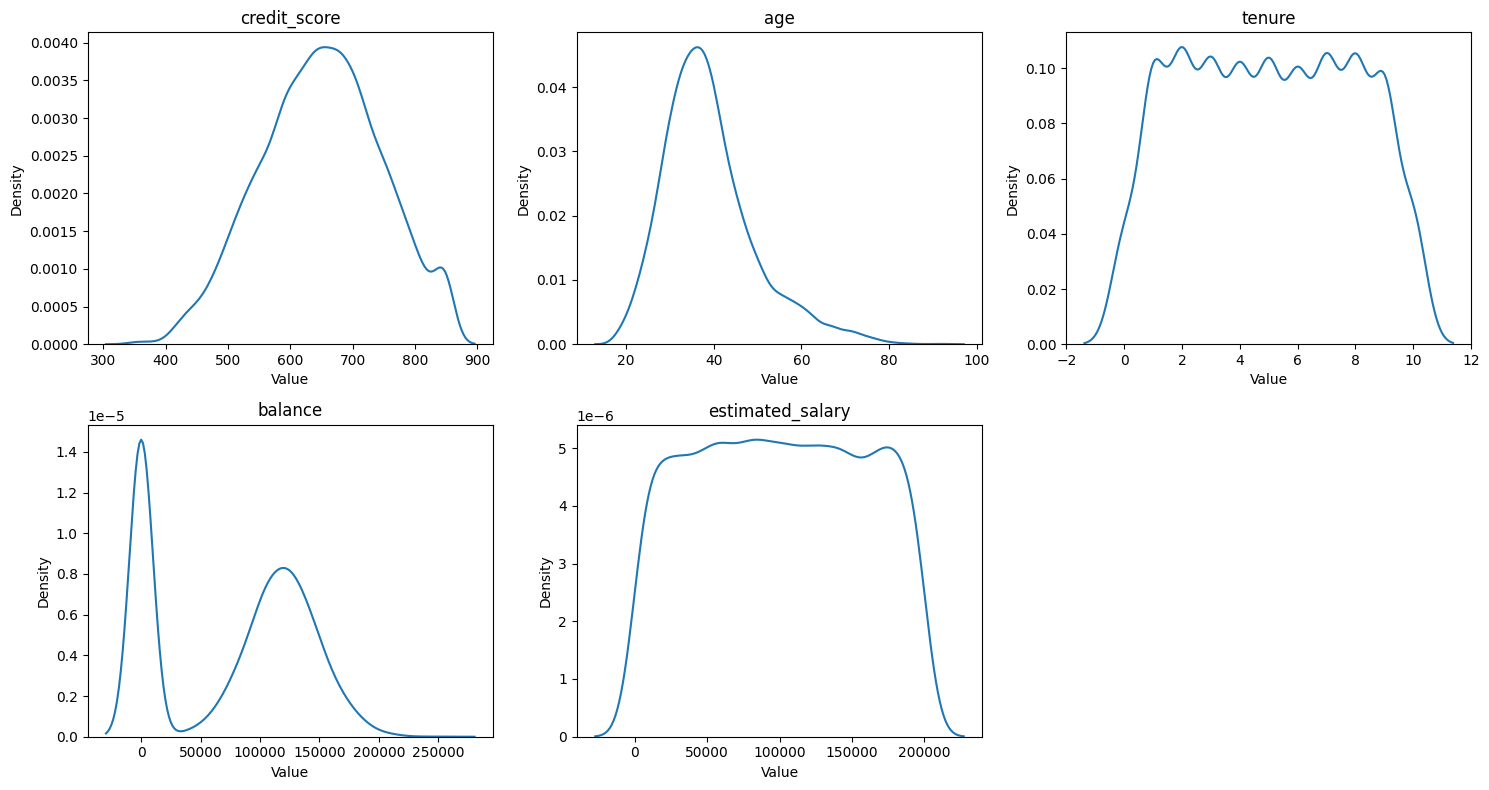

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

continuous_cols = [
    'credit_score',
    'age',
    'tenure',
    'balance',
    'estimated_salary'
]

n_cols = 3
n_rows = math.ceil(len(continuous_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

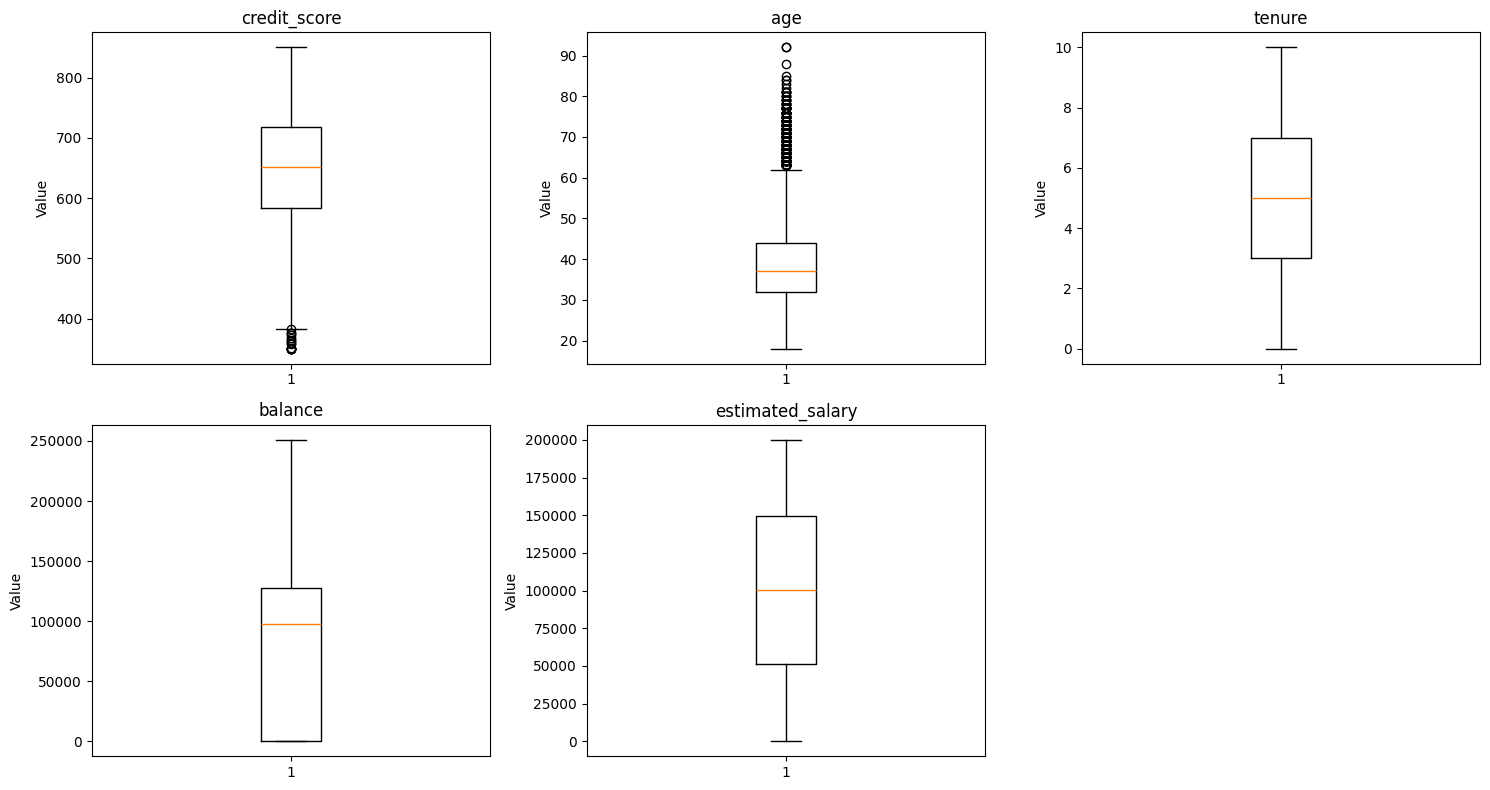

In [19]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
continuous_cols = [
    'credit_score',
    'age',
    'tenure',
    'balance',
    'estimated_salary'
]

df[continuous_cols].skew()

credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
estimated_salary    0.002085
dtype: float64

In [21]:
import numpy as np

# ----- CREDIT_CARD (lower cap) -----
Q1_cc = df['credit_score'].quantile(0.25)
Q3_cc = df['credit_score'].quantile(0.75)
IQR_cc = Q3_cc - Q1_cc

lower_cc = Q1_cc - 1.5 * IQR_cc


# ----- AGE (upper cap) -----
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

upper_age = Q3_age + 1.5 * IQR_age


print("Credit card score limit:", lower_cc)
print("Age upper limit:", upper_age)

Credit card score limit: 383.0
Age upper limit: 62.0


In [22]:
# Cap credit_card lower outliers
df['credit_score'] = np.where(
    df['credit_score'] < lower_cc,
    lower_cc,
    df['credit_score']
)

# Cap age upper outliers
df['age'] = np.where(
    df['age'] > upper_age,
    upper_age,
    df['age']
)

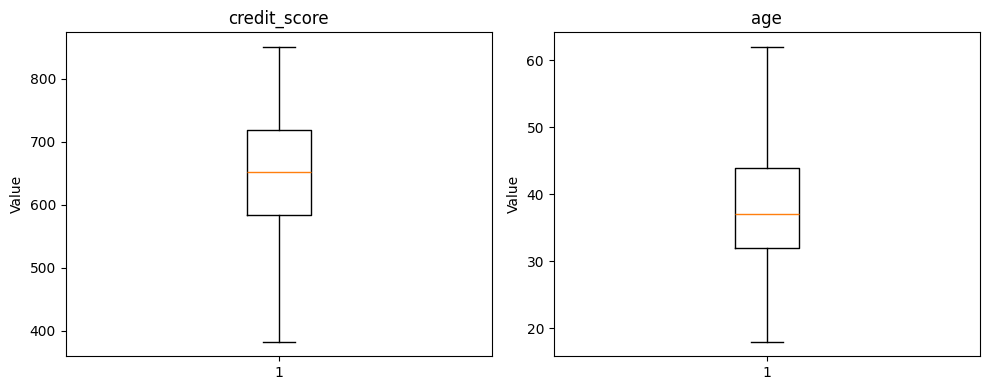

In [23]:
import matplotlib.pyplot as plt

cols = ['credit_score', 'age']

fig, axes = plt.subplots(1, 2, figsize=(10,4))

for i, col in enumerate(cols):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

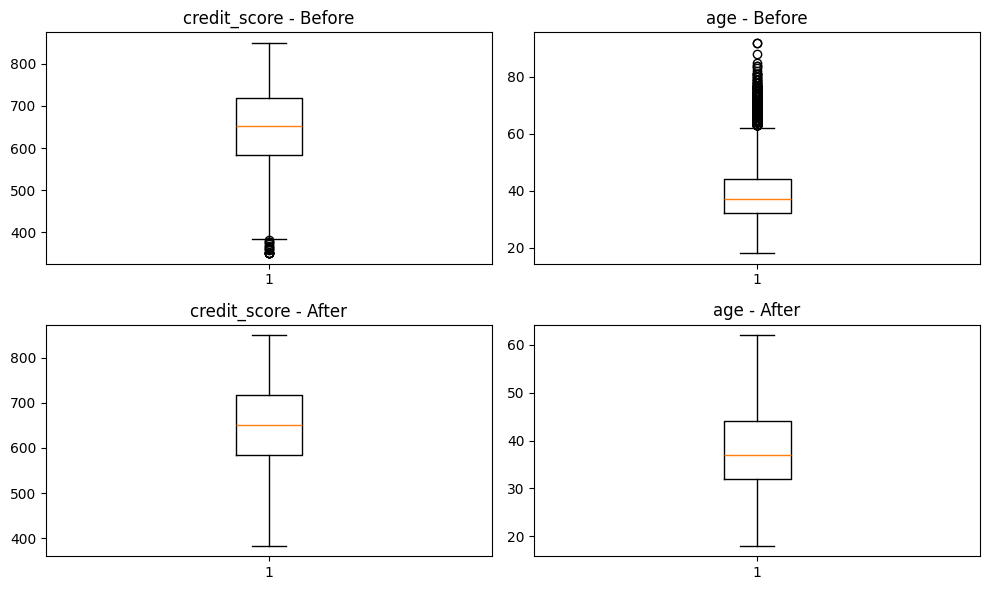

In [24]:
cols = ['credit_score', 'age']

fig, axes = plt.subplots(2, len(cols), figsize=(10,6))

for i, col in enumerate(cols):
    # Before
    axes[0, i].boxplot(df_original[col], vert=True)
    axes[0, i].set_title(f"{col} - Before")

    # After
    axes[1, i].boxplot(df[col], vert=True)
    axes[1, i].set_title(f"{col} - After")

plt.tight_layout()
plt.show()

In [25]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


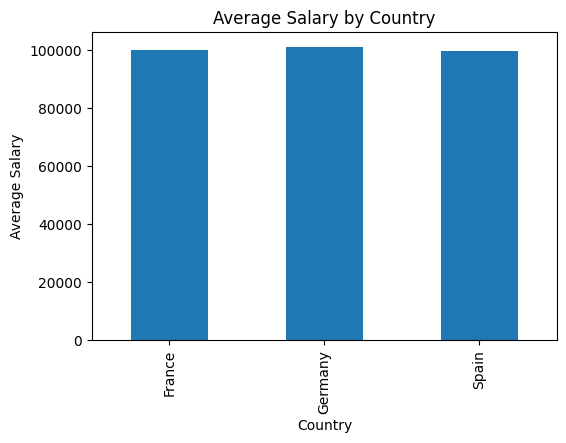

In [26]:
avg_salary = df.groupby('country')['estimated_salary'].mean()

avg_salary.plot(kind='bar', figsize=(6,4))
plt.title("Average Salary by Country")
plt.ylabel("Average Salary")
plt.xlabel("Country")
plt.show()

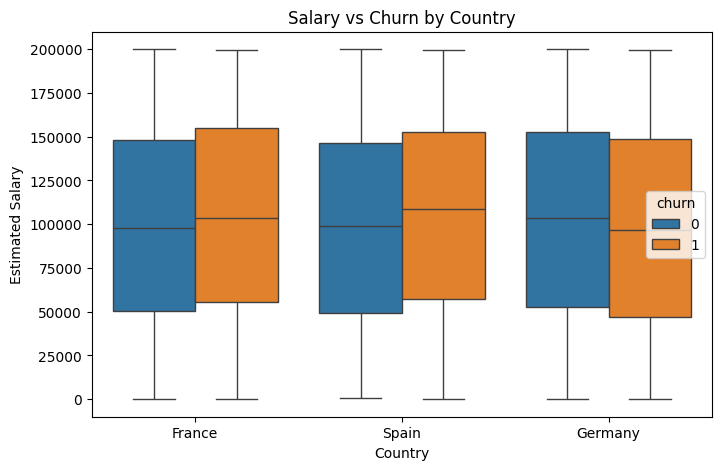

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='country', y='estimated_salary', hue='churn', data=df)
plt.title("Salary vs Churn by Country")
plt.xlabel("Country")
plt.ylabel("Estimated Salary")
plt.show()

# “Across France, Spain, and Germany, estimated salary distributions for churned and retained customers largely overlap, indicating that income level does not significantly influence customer churn. Churn occurs consistently across all salary ranges in each country, suggesting that non-financial factors such as service usage, engagement, or product features are more influential.”

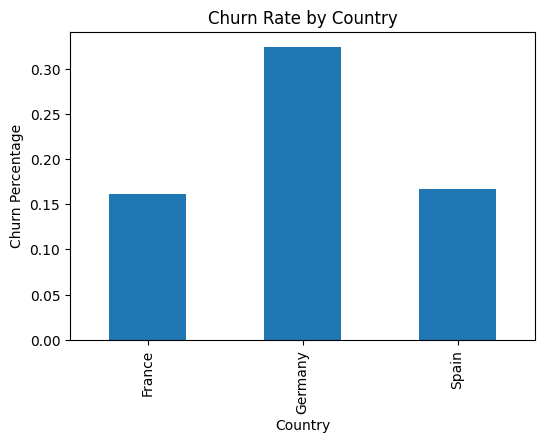

In [28]:
churn_rate = df.groupby('country')['churn'].mean()

churn_rate.plot(kind='bar', figsize=(6,4))
plt.title("Churn Rate by Country")
plt.ylabel("Churn Percentage")
plt.xlabel("Country")
plt.show()

# “Germany exhibits a significantly higher churn rate compared to France and Spain, despite similar salary distributions across countries. This indicates that churn is influenced by country-specific factors such as customer experience, service policies, or market conditions rather than income level.”

In [29]:
continuous_cols = [
    'credit_score',
    'age',
    'tenure',
    'balance',
    'estimated_salary'
]

corr_with_churn = df[continuous_cols + ['churn']].corr()

print(corr_with_churn['churn'].sort_values(ascending=False))

churn               1.000000
age                 0.312436
balance             0.118533
estimated_salary    0.012097
tenure             -0.014001
credit_score       -0.026455
Name: churn, dtype: float64


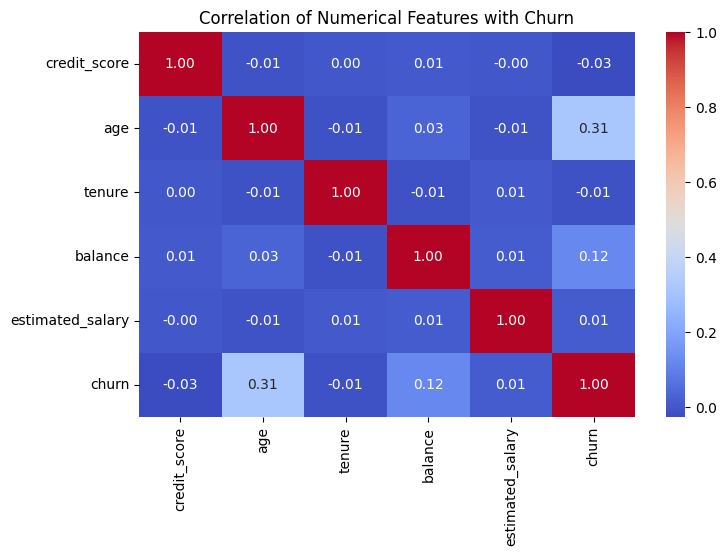

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(
    df[continuous_cols + ['churn']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation of Numerical Features with Churn")
plt.show()

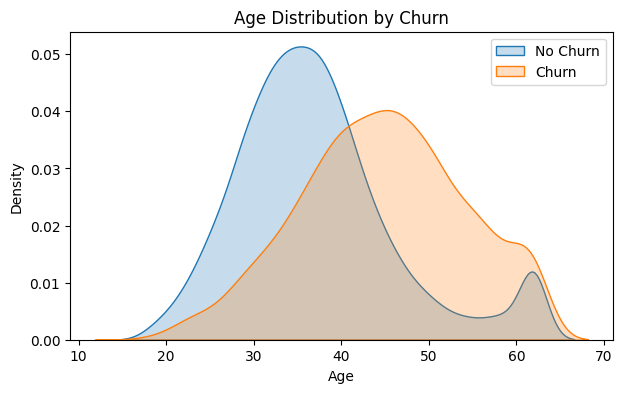

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))

sns.kdeplot(df[df['churn']==0]['age'], label='No Churn', fill=True)
sns.kdeplot(df[df['churn']==1]['age'], label='Churn', fill=True)

plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

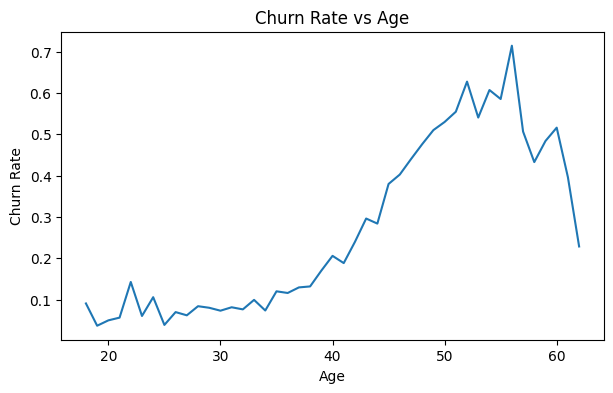

In [32]:
age_churn = df.groupby('age')['churn'].mean()

plt.figure(figsize=(7,4))
plt.plot(age_churn.index, age_churn.values)
plt.xlabel("Age")
plt.ylabel("Churn Rate")
plt.title("Churn Rate vs Age")
plt.show()

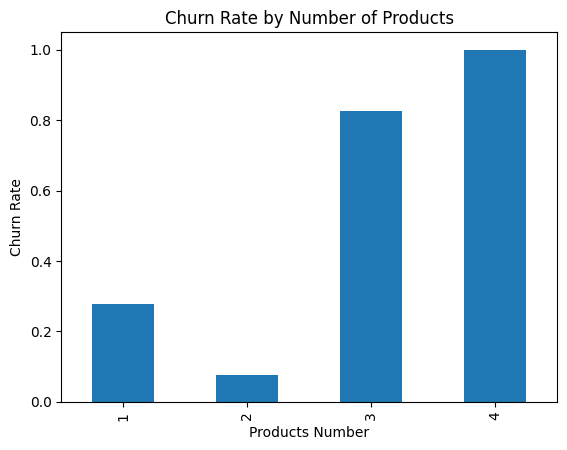

In [33]:
df.groupby('products_number')['churn'].mean().plot(kind='bar')
plt.title("Churn Rate by Number of Products")
plt.ylabel("Churn Rate")
plt.xlabel("Products Number")
plt.show()

# “Churn rate varies significantly with the number of products held. Customers with two products show the lowest churn, indicating high engagement, while those holding three or more products exhibit extremely high churn rates. This suggests that product complexity or customer dissatisfaction may increase with higher product counts, though low sample sizes may amplify this effect.”

In [34]:
df['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

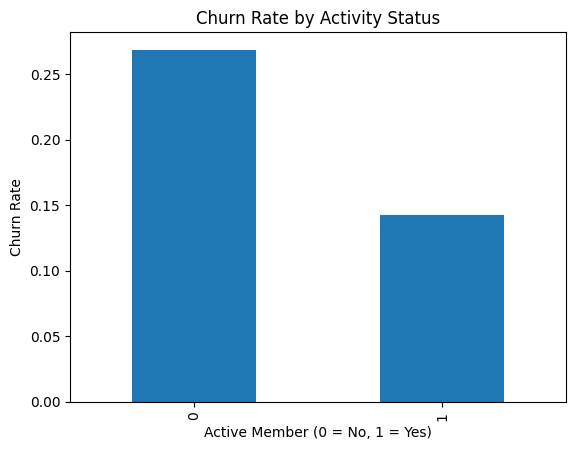

In [35]:
df.groupby('active_member')['churn'].mean().plot(kind='bar')
plt.title("Churn Rate by Activity Status")
plt.ylabel("Churn Rate")
plt.xlabel("Active Member (0 = No, 1 = Yes)")
plt.show()
# “Customer activity status shows a strong relationship with churn, with inactive members exhibiting nearly double the churn rate compared to active members. This indicates that engagement plays a critical role in customer retention.”

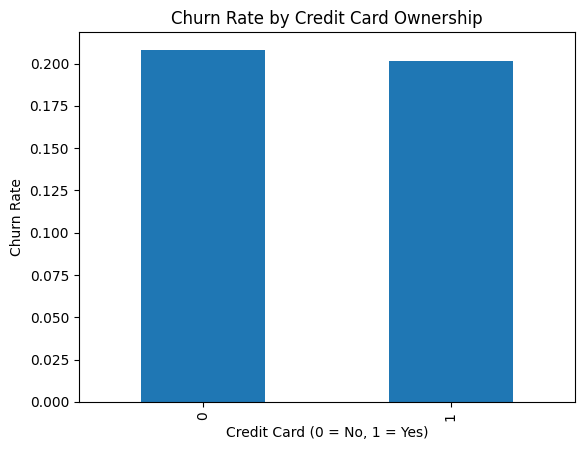

In [36]:
df.groupby('credit_card')['churn'].mean().plot(kind='bar')
plt.title("Churn Rate by Credit Card Ownership")
plt.ylabel("Churn Rate")
plt.xlabel("Credit Card (0 = No, 1 = Yes)")
plt.show()

# “While activity status and number of products show strong relationships with churn, credit card ownership exhibits minimal impact, indicating that merely holding a credit card does not significantly influence customer retention.”

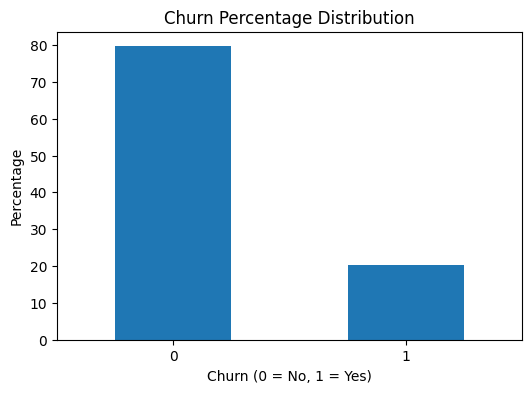

churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [37]:
churn_percent = df['churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
churn_percent.plot(kind='bar')

plt.title("Churn Percentage Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

print(churn_percent)

In [38]:
x=df.drop(columns=['churn'])
x

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64
9996,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77
9997,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58
9998,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52


In [39]:
y=df['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [41]:
x_train.shape

(8000, 10)

In [42]:
y_train.shape

(8000,)

In [43]:
y_test.value_counts()

churn
0    1588
1     412
Name: count, dtype: int64

In [44]:
categorical_cols = ['country', 'gender']

In [45]:
numerical_scaled_cols = [
    'credit_score',
    'age',
    'balance',
    'estimated_salary'
]

In [46]:
remaining_cols = [
    'tenure',
    'products_number',
    'credit_card',
    'active_member'
]

## Logistic Regression

Train Accuracy : 0.821125
Test Accuracy  : 0.815
Accuracy Gap   : 0.006125000000000047

Precision: 0.64
Recall   : 0.23300970873786409
F1 Score : 0.3416370106761566

Confusion Matrix:
[[1534   54]
 [ 316   96]]


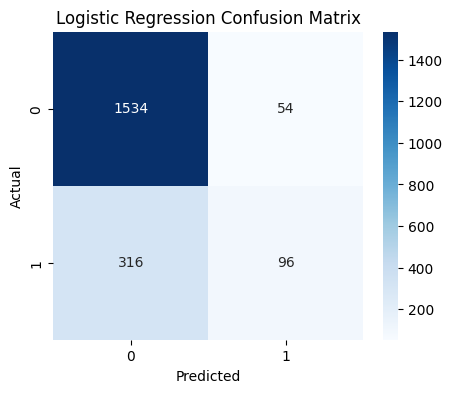


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1588
           1       0.64      0.23      0.34       412

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.79      0.81      0.78      2000



In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Define Preprocessor (with scaling)
# -----------------------------

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_scaled_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Create Pipeline
# -----------------------------

pipe_log = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('model', LogisticRegression())
])

# -----------------------------
# Train Model
# -----------------------------

pipe_log.fit(x_train, y_train)

# -----------------------------
# Predictions
# -----------------------------

y_train_pred = pipe_log.predict(x_train)
y_test_pred = pipe_log.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix (Printed)
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

# -----------------------------
# Confusion Matrix (Heatmap Plot)
# -----------------------------

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

#### Hyperparameter Tuning

Best Parameters: {'model__C': 0.01, 'model__class_weight': 'balanced', 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV F1 Score: 0.505673226213408

Train Accuracy : 0.722
Test Accuracy  : 0.7175
Accuracy Gap   : 0.0044999999999999485

Precision: 0.39270687237026647
Recall   : 0.6796116504854369
F1 Score : 0.49777777777777776

Confusion Matrix:
[[1155  433]
 [ 132  280]]


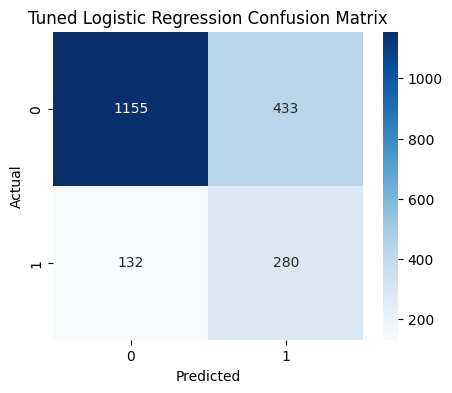


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1588
           1       0.39      0.68      0.50       412

    accuracy                           0.72      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000



In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Preprocessor
# -----------------------------

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_scaled_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_log = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('model', LogisticRegression(max_iter=1000))
])

# -----------------------------
# Hyperparameter Grid
# -----------------------------

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],          # safer choice
    'model__solver': ['lbfgs'],
    'model__class_weight': [None, 'balanced']
}

# -----------------------------
# GridSearch
# -----------------------------

grid = GridSearchCV(
    pipe_log,
    param_grid,
    cv=5,
    scoring='f1',   # Important for churn
    n_jobs=-1
)

# Train with tuning
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

# -----------------------------
# Use Best Model
# -----------------------------

best_model = grid.best_estimator_

# Predictions
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("\nTrain Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

## KNN Model

Train Accuracy : 0.8685
Test Accuracy  : 0.82
Accuracy Gap   : 0.0485000000000001

Precision: 0.63
Recall   : 0.3058252427184466
F1 Score : 0.4117647058823529

Confusion Matrix:
[[1514   74]
 [ 286  126]]


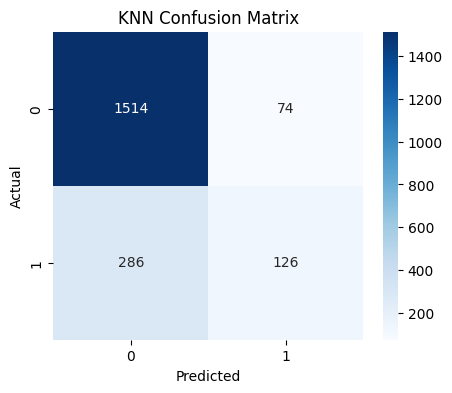


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1588
           1       0.63      0.31      0.41       412

    accuracy                           0.82      2000
   macro avg       0.74      0.63      0.65      2000
weighted avg       0.80      0.82      0.79      2000



In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Preprocessor (Scaling + OHE)
# -----------------------------

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_scaled_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Create Pipeline
# -----------------------------

pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# -----------------------------
# Train Model
# -----------------------------

pipe_knn.fit(x_train, y_train)

# -----------------------------
# Predictions
# -----------------------------

y_train_pred = pipe_knn.predict(x_train)
y_test_pred = pipe_knn.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

#### Tuning

Best Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'uniform'}
Best CV F1 Score: 0.45610628144244486

Train Accuracy : 0.889125
Test Accuracy  : 0.8235
Accuracy Gap   : 0.06562500000000004

Precision: 0.6244725738396625
Recall   : 0.3592233009708738
F1 Score : 0.4560862865947612

Confusion Matrix:
[[1499   89]
 [ 264  148]]


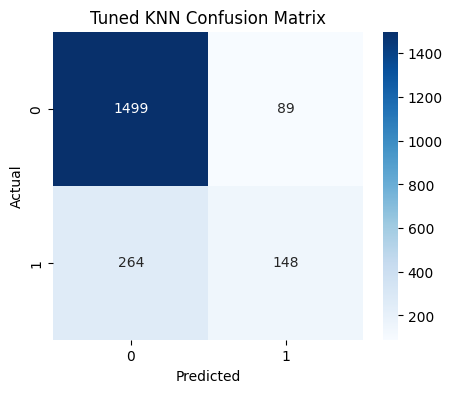


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1588
           1       0.62      0.36      0.46       412

    accuracy                           0.82      2000
   macro avg       0.74      0.65      0.68      2000
weighted avg       0.80      0.82      0.80      2000



In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Preprocessor (Scaling + OHE)
# -----------------------------

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_scaled_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('model', KNeighborsClassifier())
])

# -----------------------------
# Hyperparameter Grid
# -----------------------------

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11, 15],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

# -----------------------------
# Grid Search
# -----------------------------

grid_knn = GridSearchCV(
    pipe_knn,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_knn.fit(x_train, y_train)

print("Best Parameters:", grid_knn.best_params_)
print("Best CV F1 Score:", grid_knn.best_score_)

# -----------------------------
# Best Model
# -----------------------------

best_knn = grid_knn.best_estimator_

# Predictions
y_train_pred = best_knn.predict(x_train)
y_test_pred = best_knn.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("\nTrain Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

## Support Vector 

Train Accuracy : 0.831625
Test Accuracy  : 0.8235
Accuracy Gap   : 0.008124999999999938

Precision: 0.9041095890410958
Recall   : 0.16019417475728157
F1 Score : 0.2721649484536082

Confusion Matrix:
[[1581    7]
 [ 346   66]]


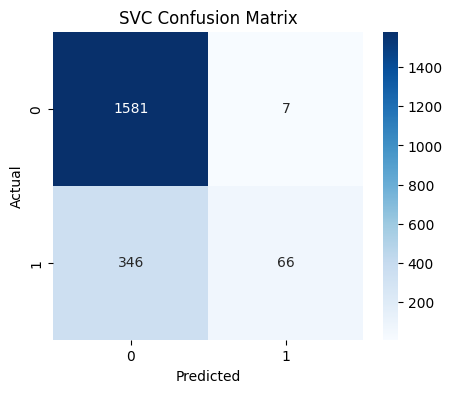


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1588
           1       0.90      0.16      0.27       412

    accuracy                           0.82      2000
   macro avg       0.86      0.58      0.59      2000
weighted avg       0.84      0.82      0.77      2000



In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Preprocessor (Scaling + OHE)
# -----------------------------

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_scaled_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('model', SVC(kernel='rbf', probability=True))
])

# -----------------------------
# Train Model
# -----------------------------

pipe_svc.fit(x_train, y_train)

# -----------------------------
# Predictions
# -----------------------------

y_train_pred = pipe_svc.predict(x_train)
y_test_pred = pipe_svc.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'model__kernel': 'rbf', 'model__gamma': 'auto', 'model__class_weight': 'balanced', 'model__C': np.float64(0.21544346900318834)}
Best CV F1 Score: 0.5490807618145808

Train Accuracy : 0.77475
Test Accuracy  : 0.7655
Accuracy Gap   : 0.009250000000000091

Precision: 0.4549763033175355
Recall   : 0.6990291262135923
F1 Score : 0.5511961722488038

Confusion Matrix:
[[1243  345]
 [ 124  288]]


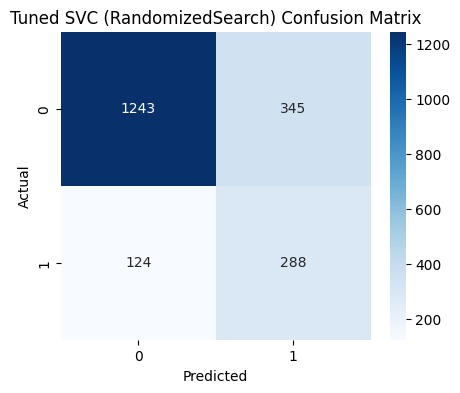


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1588
           1       0.45      0.70      0.55       412

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.78      2000



In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Preprocessor
# -----------------------------

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_scaled_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('model', SVC(probability=True))
])

# -----------------------------
# Parameter Distribution
# -----------------------------

param_dist = {
    'model__C': np.logspace(-2, 2, 10),
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto'],
    'model__class_weight': [None, 'balanced']
}

# -----------------------------
# Randomized Search
# -----------------------------

random_svc = RandomizedSearchCV(
    pipe_svc,
    param_distributions=param_dist,
    n_iter=10,              # number of random combinations to try
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_svc.fit(x_train, y_train)

print("Best Parameters:", random_svc.best_params_)
print("Best CV F1 Score:", random_svc.best_score_)

# -----------------------------
# Best Model
# -----------------------------

best_svc = random_svc.best_estimator_

# Predictions
y_train_pred = best_svc.predict(x_train)
y_test_pred = best_svc.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("\nTrain Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned SVC (RandomizedSearch) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

## Decision Tree

Train Accuracy : 1.0
Test Accuracy  : 0.798
Accuracy Gap   : 0.20199999999999996

Precision: 0.5095238095238095
Recall   : 0.5194174757281553
F1 Score : 0.5144230769230769

Confusion Matrix:
[[1382  206]
 [ 198  214]]


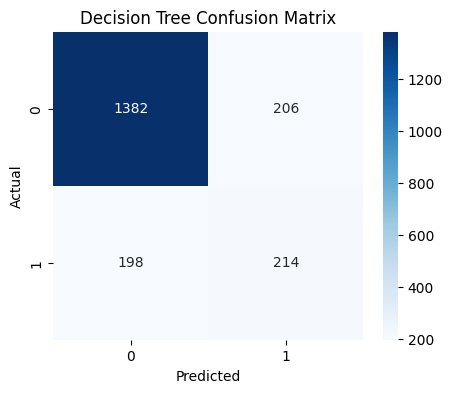


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1588
           1       0.51      0.52      0.51       412

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Preprocessor (Only Encoding)
# -----------------------------

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', DecisionTreeClassifier(random_state=42))
])

# -----------------------------
# Train Model
# -----------------------------

pipe_dt.fit(x_train, y_train)

# -----------------------------
# Predictions
# -----------------------------

y_train_pred = pipe_dt.predict(x_train)
y_test_pred = pipe_dt.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'model__min_samples_split': 20, 'model__min_samples_leaf': 10, 'model__max_depth': 15, 'model__criterion': 'entropy', 'model__class_weight': None}
Best CV F1 Score: 0.5643877425832313

Train Accuracy : 0.896375
Test Accuracy  : 0.8285
Accuracy Gap   : 0.06787500000000002

Precision: 0.6061538461538462
Recall   : 0.47815533980582525
F1 Score : 0.5345997286295794

Confusion Matrix:
[[1460  128]
 [ 215  197]]


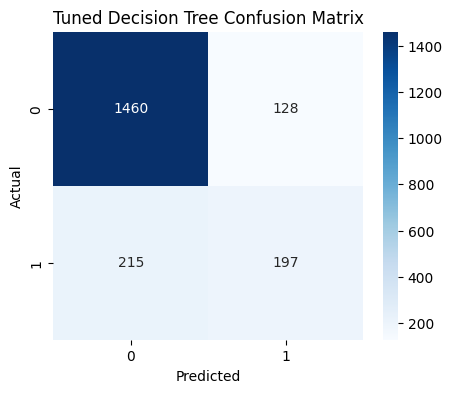


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1588
           1       0.61      0.48      0.53       412

    accuracy                           0.83      2000
   macro avg       0.74      0.70      0.71      2000
weighted avg       0.82      0.83      0.82      2000



In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Preprocessor (Only Encoding)
# -----------------------------

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', DecisionTreeClassifier(random_state=42))
])

# -----------------------------
# Parameter Distribution
# -----------------------------

param_dist = {
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10, 20],
    'model__min_samples_leaf': [1, 2, 5, 10],
    'model__criterion': ['gini', 'entropy'],
    'model__class_weight': [None, 'balanced']
}

# -----------------------------
# Randomized Search
# -----------------------------

random_dt = RandomizedSearchCV(
    pipe_dt,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_dt.fit(x_train, y_train)

print("Best Parameters:", random_dt.best_params_)
print("Best CV F1 Score:", random_dt.best_score_)

# -----------------------------
# Best Model
# -----------------------------

best_dt = random_dt.best_estimator_

# Predictions
y_train_pred = best_dt.predict(x_train)
y_test_pred = best_dt.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("\nTrain Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

## Random Forest

Train Accuracy : 1.0
Test Accuracy  : 0.857
Accuracy Gap   : 0.14300000000000002

Precision: 0.7669491525423728
Recall   : 0.4393203883495146
F1 Score : 0.558641975308642

Confusion Matrix:
[[1533   55]
 [ 231  181]]


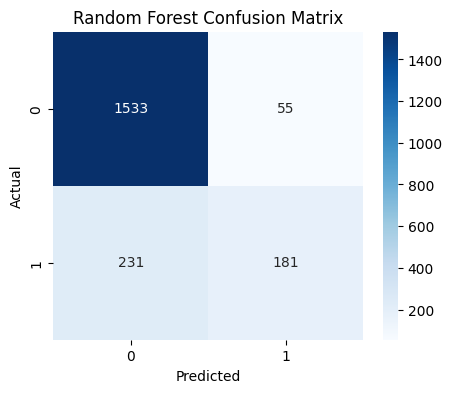


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1588
           1       0.77      0.44      0.56       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Preprocessor (Only Encoding)
# -----------------------------

preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('model', RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

# -----------------------------
# Train Model
# -----------------------------

pipe_rf.fit(x_train, y_train)

# -----------------------------
# Predictions
# -----------------------------

y_train_pred = pipe_rf.predict(x_train)
y_test_pred = pipe_rf.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best CV F1 Score: 0.6265674486390456

Train Accuracy : 0.903
Test Accuracy  : 0.842
Accuracy Gap   : 0.061000000000000054

Precision: 0.6137440758293838
Recall   : 0.6286407766990292
F1 Score : 0.6211031175059952

Confusion Matrix:
[[1425  163]
 [ 153  259]]


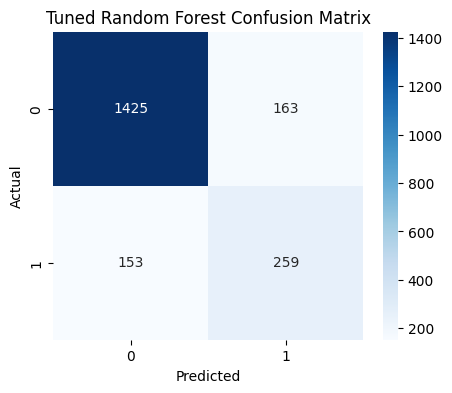


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1588
           1       0.61      0.63      0.62       412

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Preprocessor (Only Encoding)
# -----------------------------

preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('model', RandomForestClassifier(random_state=42))
])

# -----------------------------
# Parameter Grid
# -----------------------------

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2'],
    'model__class_weight': [None, 'balanced']
}

# -----------------------------
# Grid Search
# -----------------------------

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV F1 Score:", grid_rf.best_score_)

# -----------------------------
# Best Model
# -----------------------------

best_rf = grid_rf.best_estimator_

# Predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("\nTrain Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

## XG_Boost

Train Accuracy : 0.85925
Test Accuracy  : 0.8155
Accuracy Gap   : 0.043749999999999956

Precision: 0.5406427221172023
Recall   : 0.6941747572815534
F1 Score : 0.6078639744952179

Confusion Matrix:
[[1345  243]
 [ 126  286]]


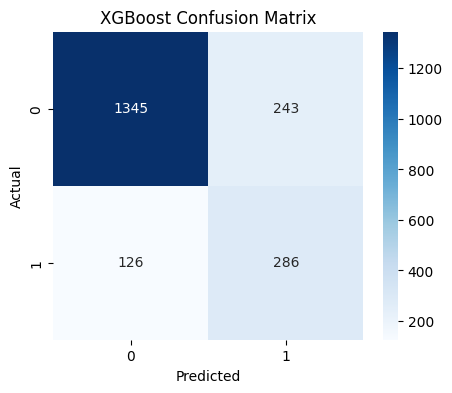


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1588
           1       0.54      0.69      0.61       412

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.82      2000



In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Handle Imbalance
# -----------------------------

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# -----------------------------
# Preprocessor (Only Encoding)
# -----------------------------

preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('model', XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        random_state=42
    ))
])

# -----------------------------
# Train Model
# -----------------------------

pipe_xgb.fit(x_train, y_train)

# -----------------------------
# Predictions
# -----------------------------

y_train_pred = pipe_xgb.predict(x_train)
y_test_pred = pipe_xgb.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'model__subsample': 0.7, 'model__n_estimators': 100, 'model__min_child_weight': 1, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__gamma': 0, 'model__colsample_bytree': 0.7}
Best CV F1 Score: 0.61241325068557

Train Accuracy : 0.86025
Test Accuracy  : 0.8195
Accuracy Gap   : 0.04074999999999995

Precision: 0.5483870967741935
Recall   : 0.7014563106796117
F1 Score : 0.6155484558040468

Confusion Matrix:
[[1350  238]
 [ 123  289]]


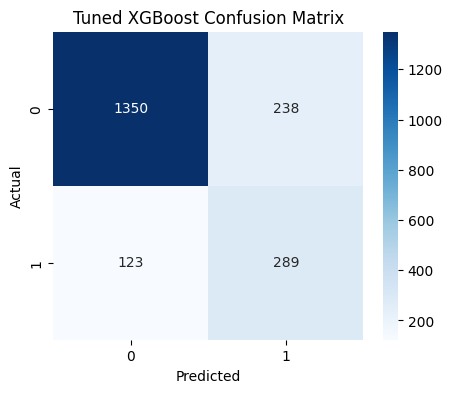


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1588
           1       0.55      0.70      0.62       412

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Handle Imbalance
# -----------------------------

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# -----------------------------
# Preprocessor (Only Encoding)
# -----------------------------

preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# -----------------------------
# Pipeline
# -----------------------------

pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=scale_pos_weight
    ))
])

# -----------------------------
# Parameter Distribution
# -----------------------------

param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.3, 0.5],
    'model__min_child_weight': [1, 3, 5]
}

# -----------------------------
# Randomized Search
# -----------------------------

random_xgb = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_dist,
    n_iter=30,           # increase for better tuning (20–40 good range)
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_xgb.fit(x_train, y_train)

print("Best Parameters:", random_xgb.best_params_)
print("Best CV F1 Score:", random_xgb.best_score_)

# -----------------------------
# Best Model
# -----------------------------

best_xgb = random_xgb.best_estimator_

# Predictions
y_train_pred = best_xgb.predict(x_train)
y_test_pred = best_xgb.predict(x_test)

# -----------------------------
# Accuracy
# -----------------------------

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
gap = train_acc - test_acc

print("\nTrain Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)
print("Accuracy Gap   :", gap)

# -----------------------------
# Precision, Recall, F1
# -----------------------------

print("\nPrecision:", precision_score(y_test, y_test_pred))
print("Recall   :", recall_score(y_test, y_test_pred))
print("F1 Score :", f1_score(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix
# -----------------------------

cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

In [66]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": best_model,
    "KNN": best_knn,
    "SVC": best_svc,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

results = []

for name, model in models.items():
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    gap = train_acc - test_acc
    
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
        "Accuracy Gap": round(gap, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)

results_df

,Model,Train Accuracy,Test Accuracy,Accuracy Gap,Precision,Recall,F1 Score
4,Random Forest,0.9030,0.8420,0.0610,0.6137,0.6286,0.6211
5,XGBoost,0.8602,0.8195,0.0407,0.5484,0.7015,0.6155
2,SVC,0.7748,0.7655,0.0093,0.4550,0.6990,0.5512
3,Decision Tree,0.8964,0.8285,0.0679,0.6062,0.4782,0.5346
0,Logistic Regression,0.7220,0.7175,0.0045,0.3927,0.6796,0.4978
1,KNN,0.8891,0.8235,0.0656,0.6245,0.3592,0.4561


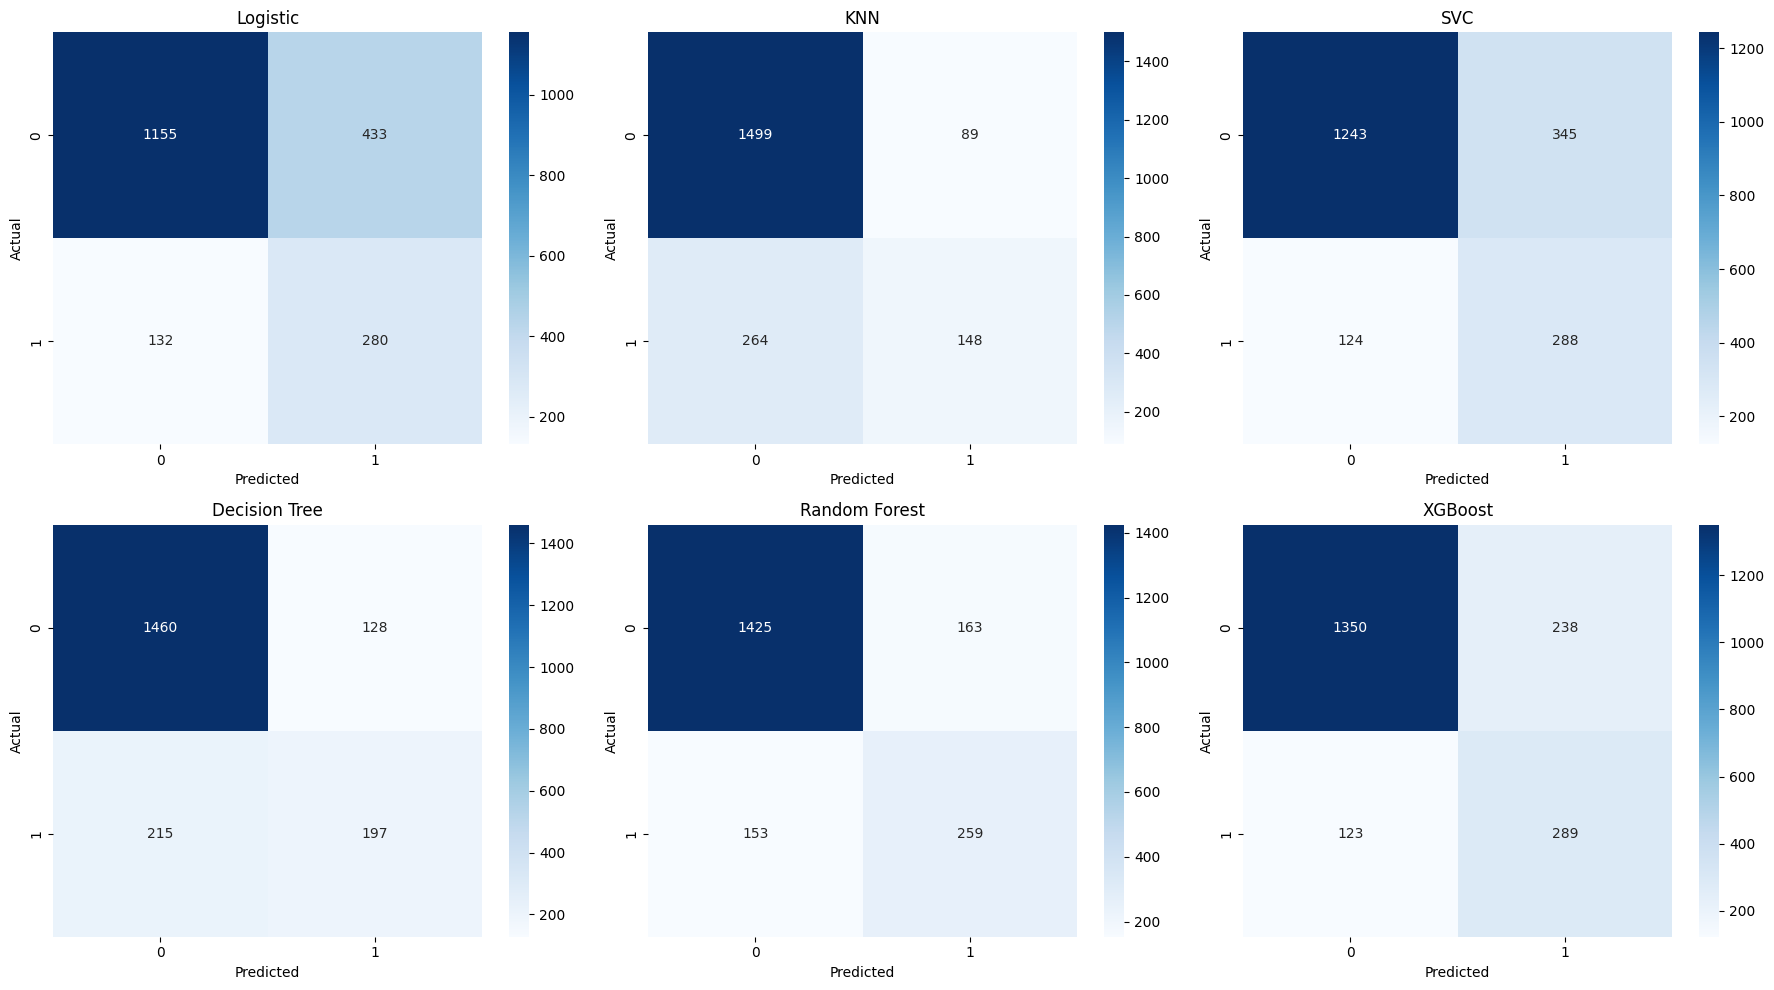

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -----------------------------
# Put models in dictionary
# -----------------------------

models = {
    "Logistic": best_model,
    "KNN": best_knn,
    "SVC": best_svc,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

# -----------------------------
# Create Subplots
# -----------------------------

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues', 
                ax=ax)
    
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [68]:
import pickle

# Save the best XGBoost model
with open("xgboost_churn_model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)

print("Model saved successfully!")

Model saved successfully!
